# TF-IDF Model for classification

https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/

**Downloading useful tools**

In [1]:
#pip install datasets

In [2]:
pip install imblearn --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import nltk
#nltk.download('stopwords')

In [4]:
#!spacy download fr_core_news_sm

In [5]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
import spacy
from datasets import load_dataset

In [6]:
dataset_train = load_dataset("oscarfossey/NLP_Pole_emploi", data_files='train_dataset.csv')
dataset_val = load_dataset("oscarfossey/NLP_Pole_emploi", data_files='val_dataset.csv')

Using custom data configuration oscarfossey--NLP_Pole_emploi-153f415cbc12e71d
Reusing dataset csv (C:\Users\admin\.cache\huggingface\datasets\csv\oscarfossey--NLP_Pole_emploi-153f415cbc12e71d\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration oscarfossey--NLP_Pole_emploi-22894eb1eb004fbf
Reusing dataset csv (C:\Users\admin\.cache\huggingface\datasets\csv\oscarfossey--NLP_Pole_emploi-22894eb1eb004fbf\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df_train = pd.DataFrame(dataset_train['train'])
df_val = pd.DataFrame(dataset_val['train'])

In [8]:
df_train.head(1)

,textual description,code_rome,categorie,sub_categorie,sub_sub_categorie,name,text_length
0,Nous recherchons pour le compte de notre clien...,I1305,I,13,5,Installation et maintenance électronique,304


**Preprocessing du texte**

In [9]:
stopwords = nltk.corpus.stopwords.words('french')
nlp = spacy.load("fr_core_news_sm")

In [10]:
def preprocessing(text):
    text = text.lower()
    text = text.replace('(', ' ').replace(')', ' ').replace('.', ' ').replace('  ', ' ')  #drop '(', ')', '.'
    text = nlp(text)
    #words = [token.text for token in sent for sent in doc.sents if not token.text in set(stopwords)]
    words = [token.lemma_ for sent in text.sents for token in sent if not token.text in set(stopwords)]
    string = ' '.join(words)
    return string

**Raw text :**

In [11]:
df_train.iloc[0]['textual description']

"Nous recherchons pour le compte de notre client basé à Crepy en Valois un(e) Electromecanicien.les tâches sont:Suivi de la disponibilité du matériel nettoyage, réparations des éléments défectueux Rédaction des fiches techniques d'intervention Participation à l'amélioration des procédures de maintenance "

**Preprocessed text :**

In [12]:
preprocessing(df_train.iloc[0]['textual description'])

'rechercher compte client baser crepy valoi e electromecanicien tâche : suivre disponibilité matériel nettoyage , réparation élément défectueux rédaction fiche technique de intervention participation le amélioration procédure maintenance'

In [13]:
df_train['textual description'] = df_train['textual description'].apply(preprocessing)


In [14]:
df_val['textual description'] = df_val['textual description'].apply(preprocessing)

In [15]:
train_X = df_train['textual description']   
train_y = df_train['categorie']   
val_X = df_val['textual description']
val_y = df_val['categorie']

**Vectorization**

In [16]:
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_vect = tf_idf.fit_transform(train_X)
#applying tf idf to training data
X_train_vect = tf_idf.transform(train_X)

In [17]:
print("n_samples: %d, n_features: %d" % X_train_vect.shape)

n_samples: 38640, n_features: 96238


**We fit the transformer on the train dataset and use this transformer to estimate the validation dataset (whitou fitting)**

In [18]:
#transforming test data into tf-idf matrix
X_val_vect = tf_idf.transform(val_X)

In [19]:
print("n_samples: %d, n_features: %d" % X_val_vect.shape)

n_samples: 12881, n_features: 96238


**Prediction with a naive Bayes Classifier using the transformer**

In [20]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vect, train_y)

MultinomialNB()

In [21]:
y_pred = naive_bayes_classifier.predict(X_val_vect)
print(metrics.classification_report(val_y, y_pred, target_names=list(df_train["categorie"].unique())))

              precision    recall  f1-score   support

           I       0.97      0.18      0.30       680
           N       0.00      0.00      0.00       185
           K       0.97      0.12      0.22       619
           G       0.82      0.49      0.62      1046
           H       1.00      0.05      0.09       489
           A       0.93      0.31      0.46      1054
           M       0.87      0.33      0.48       863
           L       0.33      0.96      0.50      2324
           D       0.97      0.07      0.13       810
           B       0.94      0.51      0.66       910
           F       0.47      0.74      0.58      1718
           E       1.00      0.09      0.16       198
           J       0.50      0.51      0.50      1257
           C       0.97      0.08      0.15       728

    accuracy                           0.47     12881
   macro avg       0.77      0.32      0.35     12881
weighted avg       0.71      0.47      0.43     12881



D:\Logiciel\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Logiciel\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Logiciel\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

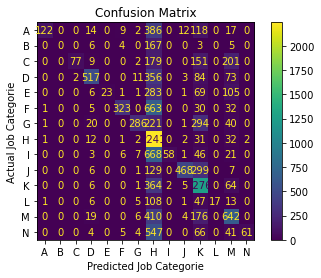

In [23]:
cm = confusion_matrix(val_y, y_pred)

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=list(df_val.sort_values("categorie")["categorie"].unique()))
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix', 
                xlabel='Predicted Job Categorie', 
                ylabel='Actual Job Categorie',)

plt.rcParams["figure.figsize"] = (15,15)
plt.show()

Blue : predicted label 
Orange : true label


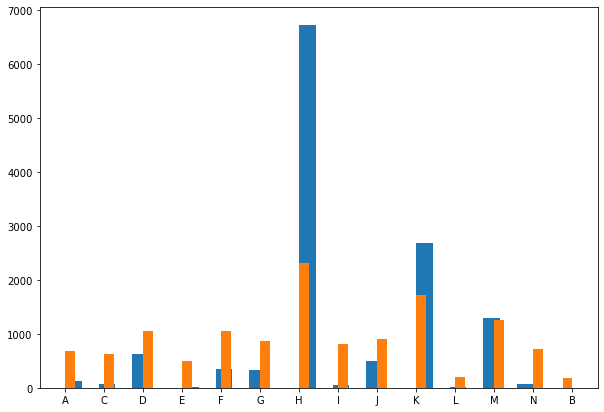

In [24]:

pd.DataFrame(y_pred).sort_values(0)[0].hist(bins = 28, grid = False, figsize = (10,7))
df_val.sort_values('categorie')["categorie"].hist(bins = 52, grid = False, figsize = (10,7))
print("Blue : predicted label \nOrange : true label")

**Although we suspect that the Tf-idf model can not perform perfectly to classify the trades. We notice that our training dataset is unbalanced and biases the naive bayes estimator.**

## Balancing the datset using over/under sampling method on the train set

**OverSampling**

In [40]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy ='all')

In [41]:
train_X_over, y_train_over = oversample.fit_resample(train_X.values.reshape(-1, 1), train_y.values.reshape(-1, 1))

In [42]:
train_X_over, y_train_over = train_X_over.flatten(), y_train_over.flatten()

**Train of tf_idf model with over sampled data**

In [43]:
#tf idf
tf_idf_over = TfidfVectorizer()
#applying tf idf to training data
X_train_vect_over = tf_idf_over.fit_transform(train_X_over)
#applying tf idf to training data
X_train_vect_over = tf_idf_over.transform(train_X_over)

In [44]:
print("n_samples: %d, n_features: %d" % X_train_vect_over.shape)

n_samples: 95242, n_features: 96238


Blue : balanced dataset 
Orange : unbalanced dataset


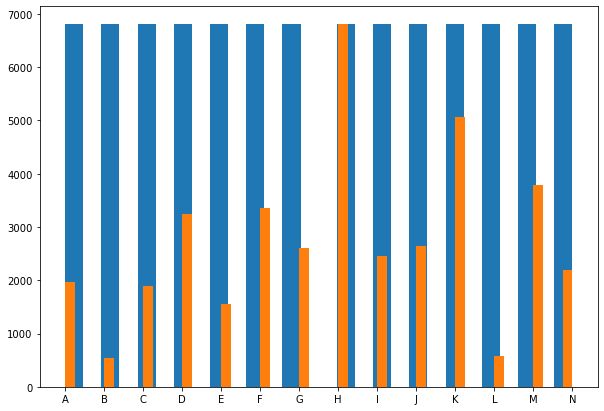

In [45]:
pd.DataFrame(y_train_over).sort_values(0)[0].hist(bins = 28, grid = False, figsize = (10,7))
df_train.sort_values('categorie')["categorie"].hist(bins = 52, grid = False, figsize = (10,7))
print("Blue : balanced dataset \nOrange : unbalanced dataset")

**Vectorization of the validation data (NOT OVER SAMPLED)**

In [46]:
#transforming test data into tf-idf matrix
X_val_vect_over = tf_idf_over.transform(val_X)
print("n_samples: %d, n_features: %d" % X_val_vect.shape)

n_samples: 12881, n_features: 96238


In [48]:
naive_bayes_classifier_over = MultinomialNB()
naive_bayes_classifier_over.fit(X_train_vect_over, y_train_over)

MultinomialNB()

In [52]:
y_pred_over = naive_bayes_classifier_over.predict(X_val_vect_over)
print(metrics.classification_report(val_y, y_pred_over, target_names=list(df_train["categorie"].unique())))

              precision    recall  f1-score   support

           I       0.85      0.68      0.76       680
           N       0.44      0.68      0.54       185
           K       0.48      0.78      0.59       619
           G       0.75      0.69      0.72      1046
           H       0.63      0.54      0.58       489
           A       0.73      0.74      0.74      1054
           M       0.75      0.77      0.76       863
           L       0.75      0.67      0.71      2324
           D       0.61      0.67      0.64       810
           B       0.81      0.91      0.86       910
           F       0.82      0.58      0.68      1718
           E       0.76      0.57      0.65       198
           J       0.51      0.66      0.58      1257
           C       0.70      0.71      0.71       728

    accuracy                           0.69     12881
   macro avg       0.69      0.69      0.68     12881
weighted avg       0.71      0.69      0.69     12881



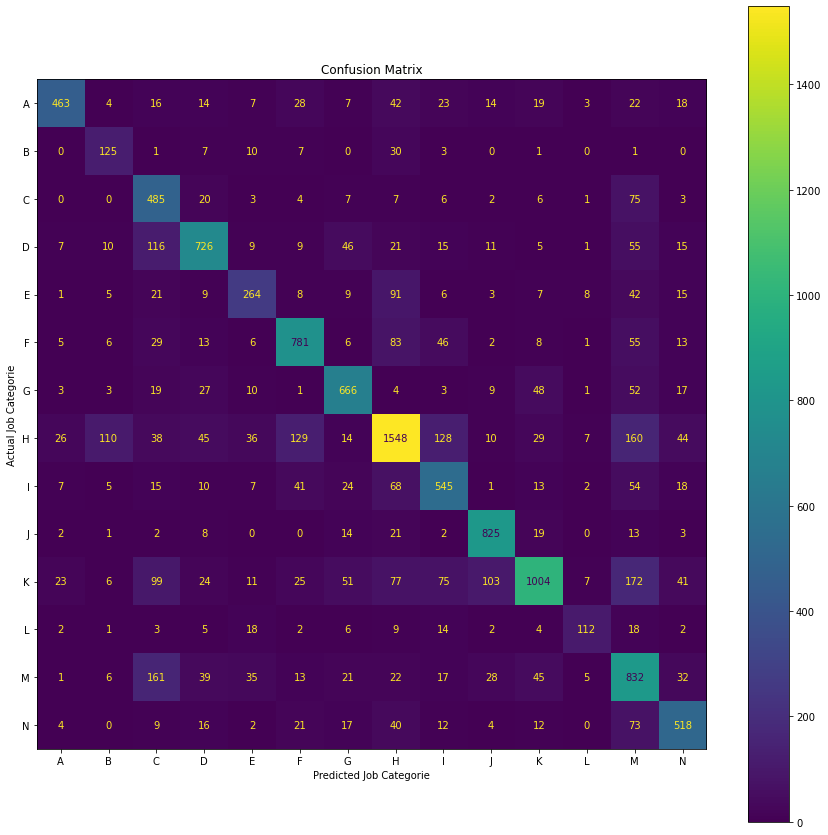

In [54]:
cm_over = confusion_matrix(val_y, y_pred_over)

cmd_obj_over = ConfusionMatrixDisplay(cm_over, display_labels=list(df_val.sort_values("categorie")["categorie"].unique()))
cmd_obj_over.plot()
cmd_obj_over.ax_.set(title='Confusion Matrix', 
                xlabel='Predicted Job Categorie', 
                ylabel='Actual Job Categorie',)

plt.rcParams["figure.figsize"] = (15,15)
plt.show()

**UnderSampling**

In [55]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy ='all')

n_samples: 7490, n_features: 37491
n_samples: 12881, n_features: 96238
              precision    recall  f1-score   support

           I       0.84      0.60      0.70       680
           N       0.41      0.63      0.50       185
           K       0.35      0.83      0.49       619
           G       0.74      0.64      0.69      1046
           H       0.64      0.48      0.55       489
           A       0.72      0.68      0.70      1054
           M       0.73      0.70      0.71       863
           L       0.72      0.62      0.67      2324
           D       0.54      0.68      0.60       810
           B       0.77      0.89      0.83       910
           F       0.82      0.45      0.58      1718
           E       0.77      0.57      0.65       198
           J       0.49      0.63      0.55      1257
           C       0.66      0.68      0.67       728

    accuracy                           0.64     12881
   macro avg       0.66      0.65      0.64     12881
weighted 

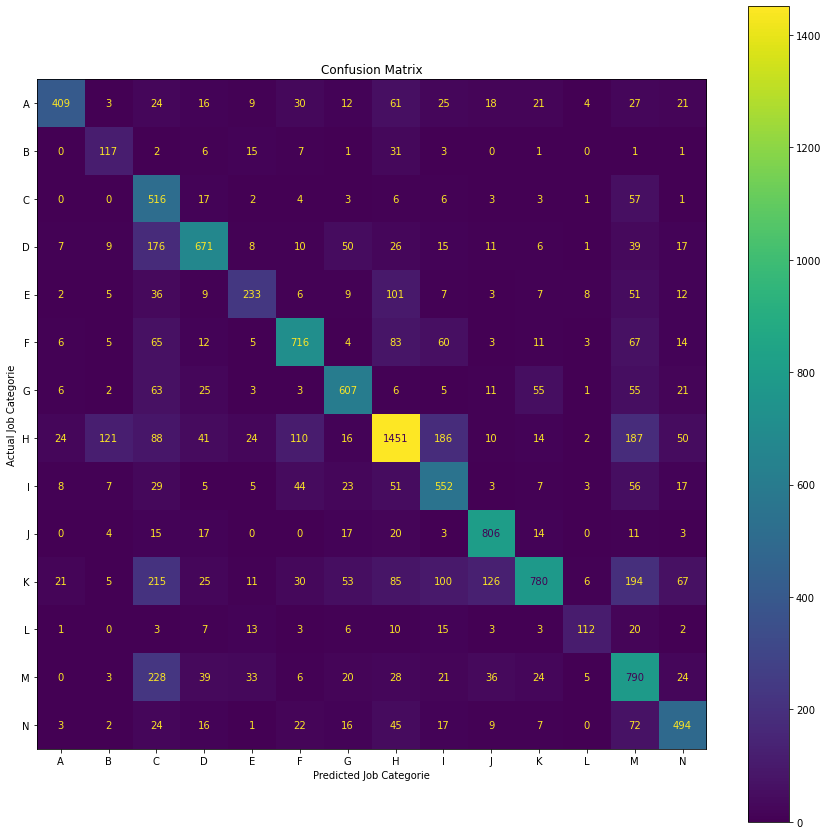

In [59]:
train_X_under, y_train_under = undersample.fit_resample(train_X.values.reshape(-1, 1), train_y.values.reshape(-1, 1))
train_X_under, y_train_under = train_X_under.flatten(), y_train_under.flatten()
#tf idf
tf_idf_under = TfidfVectorizer()
#applying tf idf to training data
X_train_vect_under = tf_idf_under.fit_transform(train_X_under)
#applying tf idf to training data
X_train_vect_under = tf_idf_under.transform(train_X_under)
print("n_samples: %d, n_features: %d" % X_train_vect_under.shape)
#transforming test data into tf-idf matrix
X_val_vect_under = tf_idf_under.transform(val_X)
print("n_samples: %d, n_features: %d" % X_val_vect.shape)
naive_bayes_classifier_under = MultinomialNB()
naive_bayes_classifier_under.fit(X_train_vect_under, y_train_under)
y_pred_under = naive_bayes_classifier_under.predict(X_val_vect_under)
print(metrics.classification_report(val_y, y_pred_under, target_names=list(df_train["categorie"].unique())))
cm_under= confusion_matrix(val_y, y_pred_under)

cmd_obj_under = ConfusionMatrixDisplay(cm_under, display_labels=list(df_val.sort_values("categorie")["categorie"].unique()))
cmd_obj_under.plot()
cmd_obj_under.ax_.set(title='Confusion Matrix', 
                xlabel='Predicted Job Categorie', 
                ylabel='Actual Job Categorie',)

plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Conclusion

With made three models using tfidf methods with three different sampling technics to build our train dataset.

 -No sampling technics : 47% accuracy on the val dataset
 
 -Oversampling technics : 69% accuracy on the val dataset
 
 -Undersampling technics : 64% accuracy on the val dataset